illustration of an intersection of a plane with a spherical volume element where the plane intersects the max-r cusp (illustrated in 2d)

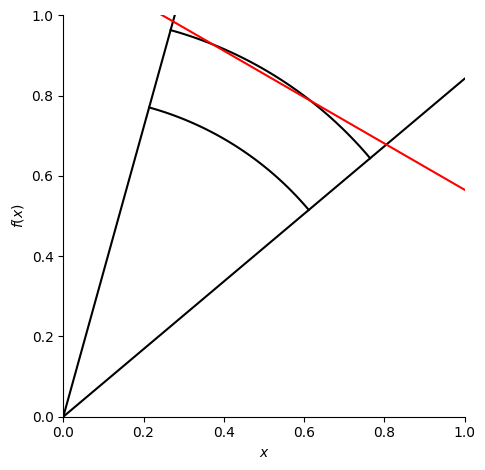

In [6]:
from sympy import symbols
from sympy import tan, cos
from sympy.plotting import plot, plot3d, PlotGrid

x, y = symbols('x, y')

outer_radius = 1.0 
inner_radius = 0.8
outer_circle_y = (outer_radius**2 - x**2)**(0.5)
inner_circle_y = (inner_radius**2 - x**2)**(0.5)

theta_min = 0.7
theta_max = 1.3

# tan(theta) = y / x
min_theta_line = x * tan(theta_min)
max_theta_line = x * tan(theta_max)

def get_plane(x_intersect, radius, shift=-0.01):
    # get a plane tangent to a circle at a given point 
    # and then shift it along the plane's normal 
    
    # first, get the y point on the circle for an x 
    # location
    y_intersect = (radius**2 - x_intersect**2)**(0.5)

    # normal vector of the tangent plane will simply be 
    normal_vec = (x_intersect, y_intersect)

    # shift x and y along normal vector
    x_intersect = x_intersect + shift * normal_vec[0]
    y_intersect = y_intersect + shift * normal_vec[1]

    # calculate the d value of our shifted plane 
    d = normal_vec[0]*x_intersect + normal_vec[1]*y_intersect

    # finally our plane
    plane = (d - normal_vec[0]*x)/normal_vec[1]
    return plane 

plane = get_plane(0.5, outer_radius)

plane2 = get_plane(0.9, outer_radius, shift=-0.1)


outer_range = (x, cos(theta_max)*outer_radius, cos(theta_min)*outer_radius)
inner_range = (x, cos(theta_max)*inner_radius, cos(theta_min)*inner_radius)

p1 = plot((outer_circle_y, outer_range), 
          (inner_circle_y, inner_range),
          (min_theta_line, (x, 0, 1)), 
          (max_theta_line, (x, 0, 1)),           
         line_color='k', 
          aspect_ratio=(1,1),
         xlim=(0,1),ylim=(0,1), show=False)
p1.extend(plot(plane, (x, 0, 1), line_color='r',show=False))
# p1.extend(plot(plane2, (x, 0, 1), line_color='b',show=False))
p1.show()